In [22]:
# https://www.tensorflow.org/tutorials/quickstart/beginner?hl=pt-br
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.regularizers import l2

print(tf.__version__)


2.5.0


In [23]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(X_train, y_train),(X_test, y_test)=cifar10.load_data()

#Train-validation-test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.3)

#Dimension of the CIFAR10 dataset
print((X_train.shape, y_train.shape))
print((X_val.shape, y_val.shape))
print((X_test.shape, y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [24]:
import matplotlib.pyplot as plt
# display 14 random images from the training set
np.random.seed(42)

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

rand_14 = np.random.randint(0, X_train.shape[0],14)
sample_images = X_train[rand_14]
sample_labels = y_train[rand_14].astype(int)
sample_labels = sample_labels.reshape(-1,)

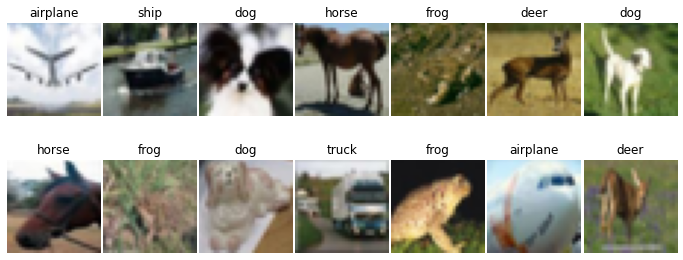

In [25]:
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_images[image_index], cmap='gray')
        ax[r,c].set_title(cifar_classes[sample_labels[image_index]])
plt.show()
plt.close()

In [26]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((X_train.shape, y_train.shape))
print((X_val.shape, y_val.shape))
print((X_test.shape, y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [27]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator()
val_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()

In [28]:
#Fitting the augmentation defined above to the data
train_generator.fit(X_train)
val_generator.fit(X_val)
test_generator.fit(X_test)

In [40]:
def lenet_model(img_shape,n_classes):
    # Initialize model
    model = tf.keras.models.Sequential()

    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=img_shape))
    model.add(layers.AveragePooling2D())

    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(layers.AveragePooling2D())

    model.add(layers.Flatten())

    model.add(layers.Dense(units=120, activation='relu'))
    model.add(layers.Dense(units=84, activation='relu'))
    model.add(layers.Dense(units=n_classes, activation = 'softmax'))

    model.summary()      
        
    return model

In [94]:
def lenet_model(img_shape,n_classes):
    # Initialize model
    model = tf.keras.models.Sequential()

    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(2,2), padding='same', activation='relu', input_shape=img_shape))
    model.add(layers.AveragePooling2D())  

    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.AveragePooling2D())
    
    model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.AveragePooling2D())

    model.add(layers.Flatten())

    model.add(layers.Dense(units=1024, activation='relu'))
    model.add(layers.Dense(units=512, activation='relu'))
    model.add(layers.Dense(units=n_classes, activation = 'softmax'))

    model.summary()      
        
    return model

In [95]:
input_shape = (32, 32, 3)
num_classes = 10
model = lenet_model(input_shape, num_classes)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 16, 16, 16)        1216      
_________________________________________________________________
average_pooling2d_49 (Averag (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 8, 8, 64)          9280      
_________________________________________________________________
average_pooling2d_50 (Averag (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
average_pooling2d_51 (Averag (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 512)             

In [96]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [97]:
history = model.fit(train_generator.flow(X_train, y_train, batch_size=128), validation_data=(val_generator.flow(X_val, y_val)), epochs=10)

Epoch 1/10
274/274 [==============================] - 6s 22ms/step - loss: 2.7028 - accuracy: 0.1199 - val_loss: 2.2982 - val_accuracy: 0.1447
Epoch 2/10
274/274 [==============================] - 6s 22ms/step - loss: 2.2959 - accuracy: 0.1388 - val_loss: 2.2931 - val_accuracy: 0.1471
Epoch 3/10
274/274 [==============================] - 6s 22ms/step - loss: 2.2903 - accuracy: 0.1458 - val_loss: 2.2874 - val_accuracy: 0.1514
Epoch 4/10
274/274 [==============================] - 6s 22ms/step - loss: 2.2859 - accuracy: 0.1457 - val_loss: 2.2811 - val_accuracy: 0.1453
Epoch 5/10
274/274 [==============================] - 6s 24ms/step - loss: 2.2714 - accuracy: 0.1549 - val_loss: 2.2608 - val_accuracy: 0.1657
Epoch 6/10
247/274 [==========================>...] - ETA: 0s - loss: 2.2443 - accuracy: 0.1732

KeyboardInterrupt: 

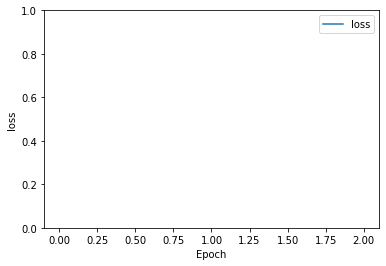

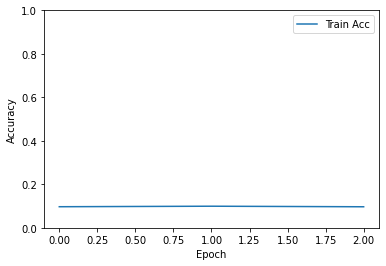

In [13]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='loss')
    #plt.plot(hist['epoch'], hist['val_loss'],
    #       label = 'Val loss')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Acc')
    #plt.plot(hist['epoch'], hist['val_accuracy'],
    #       label = 'Val Acc')
    plt.ylim([0,1])
    plt.legend()
    plt.show()


plot_history(history)


In [14]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: {}".format(scores[1]))


313/313 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1000
Accuracy: 0.10000000149011612


In [15]:
predictions = model.predict(X_test)
print(predictions.shape)


(10000, 10)


In [16]:
pred = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

### Ground truth labels

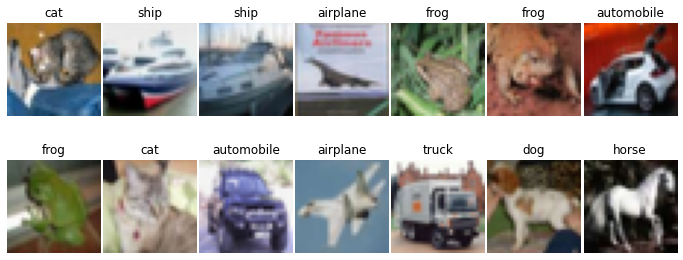

In [17]:
# code to view the images

num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(X_test[image_index], cmap='gray')
        ax[r,c].set_title(cifar_classes[y_test[image_index]])
plt.show()
plt.close()

### Predicted labels

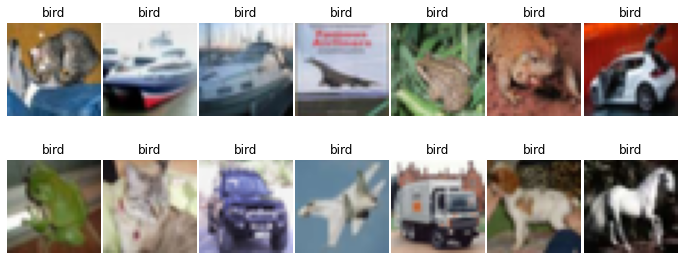

In [18]:
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(X_test[image_index], cmap='gray')
        ax[r,c].set_title(cifar_classes[pred[image_index]])
plt.show()
plt.close()